## NAC 4SIA - Rubricas 1 e 2 - Pedro Chaves e Vinicius Scarabelli

#### <b>Rubrica 1</b>

Use a imagem circulo.png para implementar um código que:
 - Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. (máx 3 pontos) 
 - Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; (máx 3 pontos) 
 - Essa rubrica pode ser feita no jupyter notebook ou google Colab.


In [13]:
# Importing librarys
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

# Getting images
img = cv2.imread('circulo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [1]:
#Pegando somente os 2 circulos
image_lower_hsv1 = np.array([0, 230, 165])
image_upper_hsv1 = np.array([10, 255, 255])
imageMask1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

image_lower_hsv2 = np.array([75, 160, 220])
image_upper_hsv2 = np.array([95, 255, 230])
imageMask2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

finalMask = cv2.bitwise_or(imageMask1, imageMask2)

#achar contornos
contorno, _ = cv2.findContours(finalMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
circles = cv2.cvtColor(finalMask, cv2.COLOR_BGR2RGB)
contornos_img = circles.copy() 

for i in contorno:
    
    contorno1 = int(cv2.moments(i)['m10']/cv2.moments(i)['m00'])
    contorno2 = int(cv2.moments(i)['m01']/cv2.moments(i)['m00'])
    texto = contorno1, contorno2, cv2.contourArea(i)
    
    cv2.line(contornos_img,(contorno1 - 40,contorno2),(contorno1 + 40,contorno2),(119, 82, 255),5)
    cv2.line(contornos_img,(contorno1,contorno2 - 40),(contorno1, contorno2 + 40),(119, 82, 255),5)
    
    if contorno1 <200:
        origem = (contorno1+200,contorno2)
    else:
        origem = (contorno1-500,contorno2)

    cv2.putText(contornos_img, str(texto), origem, cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)

    
plt.figure(figsize = (10,10))
plt.imshow(contornos_img);
plt.show()

NameError: name 'np' is not defined

#### <b>Rubrica 2</b>

 - Traça uma reta entre os dois centros dos círculos; (máx 0,5 pontos) 
 - Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com  uma reta entre centros e valor do ângulo exibido na tela;  (máx 1,5 pontos)  
 - Essa rubrica pode ser feita no jupyter notebook ou google Colab.

Inclinação da reta 1 = 0.53
Inclinação da reta 2 = 0
Angulo agudo entre as retas = 27.99
Angulo obituso entre as retas = 152.01


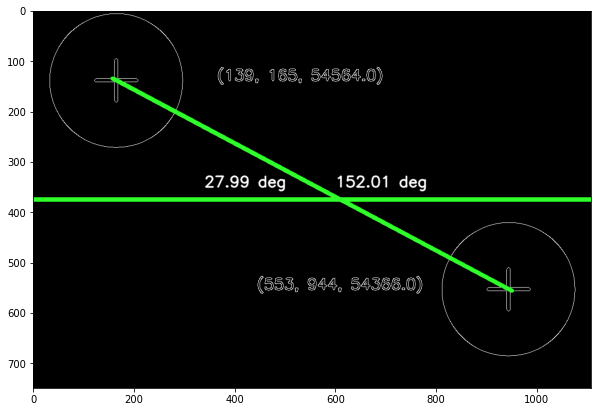

In [77]:
from math import atan

line1 = cv2.line(contornos_img, (165, 139), (944, 553), (47, 255, 43), 1)
line2 = cv2.line(contornos_img, (0, 375), (1200, 375), (43, 47, 255), 1)

edges = cv2.Canny(contornos_img,50,200)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 200, np.array([]), 100, 100)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (47, 255, 43), 5)
    
# definir função para achar m 
def slopeLine(x1, y1, x2, y2):
    return (float)(y2 - y1)/(x2 - x1)

def findAngle(m1, m2):
    tanAngle = abs((m2 - m1) / (1 + m1 * m2))
    angle = atan(tanAngle) 
    angleDegrees = (angle * 180) / math.pi
    return round(angleDegrees, 2)
    
m1 = slopeLine(165, 139, 944, 553)
m2 = slopeLine(0, 375, 1200, 375)
angle1 = findAngle(m1, m2)
angle2 = 180 - angle1

print("Inclinação da reta 1 =", format(m1,".2f"))
print("Inclinação da reta 2 =", format(m2,".0f"))
print("Angulo agudo entre as retas =", angle1) 
print("Angulo obituso entre as retas =", angle2) 

xString1 = str(angle1)
xString2 = str(angle2)

cv2.putText(hough_img_rgb, str(xString1 + ' deg'), (340, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                 (255, 255, 255), 2, cv2.LINE_AA, False)

cv2.putText(hough_img_rgb, str(xString2 + ' deg'), (600, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                 (255, 255, 255), 2, cv2.LINE_AA, False)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb)
plt.show()